In [3]:
# Libraries to work with dataframe
import json
import pandas as pd
import numpy as np
# Libraries for datetime
import datetime as dt
# Libraries for EDA
import matplotlib as plt
import seaborn as sns
# Libraries for ML
from sklearn import linear_model, datasets
import statsmodels.api as sm

Load the data set

In [4]:
 #Load the data
population_df=pd.read_csv(r'C:\Users\layin\OneDrive\Desktop\TESTTEST\LHL_Midterm_Project\Data\Clean_data\df_population.csv', sep=",")
male_df=pd.read_csv(r'C:\Users\layin\OneDrive\Desktop\TESTTEST\LHL_Midterm_Project\Data\Clean_data\df_male.csv', sep=",")
female_df=pd.read_csv(r'C:\Users\layin\OneDrive\Desktop\TESTTEST\LHL_Midterm_Project\Data\Clean_data\df_female.csv', sep=",")

# Check dataset
population_df.head()

,Time,Time Code,Country Name,Country Code,CPIA economic management cluster average,CPIA financial sector rating,CPIA macroeconomic management rating,Automated teller machines,Borrowers from commercial banks,Depth of credit information index,...,Exports of goods and services annual_growth,"Foreign direct investment, net inflows %GDP","Foreign direct investment, net outflows %GDP",Fuel exports,High-technology exports,ICT goods imports,Imports of goods and services %GDP,"Personal remittances, paid","Personal transfers, receipts","Taxes on income, profits and capital gains"
0,2016-01-01,YR2016,Algeria,DZA,0.0,0.0,0.0,8.668604,39.065192,0,...,7.900000,1.029475,0.029423,93.992128,0.343524,5.181022,35.270284,5.897023e+07,1.696801e+07,0.000000
1,2016-01-01,YR2016,Argentina,ARG,0.0,0.0,0.0,60.103738,393.196312,8,...,5.292669,0.587564,0.321978,2.532451,8.792815,8.478812,13.538081,8.235657e+08,3.526393e+08,21.864873
2,2016-01-01,YR2016,Australia,AUS,0.0,0.0,0.0,168.028316,0.000000,7,...,6.865286,3.524720,-0.207303,27.653921,14.781559,9.997245,21.518447,6.309637e+09,0.000000e+00,71.668280
3,2016-01-01,YR2016,Austria,AUT,0.0,0.0,0.0,116.058589,0.000000,7,...,1.915409,-7.663361,-7.325377,1.705898,17.574765,7.449426,48.905179,4.523562e+09,3.008084e+08,46.083584
4,2016-01-01,YR2016,Belgium,BEL,0.0,0.0,0.0,88.227548,698.712686,5,...,7.517204,7.916496,6.142702,6.825841,12.536063,3.003773,81.606927,3.890063e+09,7.971687e+07,54.611886


In [17]:
population_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58 entries, 0 to 57
Data columns (total 92 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Time                                                        58 non-null     object 
 1   Time Code                                                   58 non-null     object 
 2   Country Name                                                58 non-null     object 
 3   Country Code                                                58 non-null     object 
 4   CPIA economic management cluster average                    58 non-null     float64
 5   CPIA financial sector rating                                58 non-null     float64
 6   CPIA macroeconomic management rating                        58 non-null     float64
 7   Automated teller machines                                   58 non-null     float64
 8   Borrowe

In [12]:
male_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Time                                        986 non-null    object 
 1   Time Code                                   986 non-null    object 
 2   Country Name                                986 non-null    object 
 3   Country Code                                986 non-null    object 
 4   Gender                                      986 non-null    object 
 5   Labor force participation rate              986 non-null    float64
 6   Unemployment with advanced education        986 non-null    float64
 7   Unemployment with intermediate education    986 non-null    float64
 8   Unemployment                                986 non-null    float64
 9   Unemployment youth                          986 non-null    float64
 10  Life expectanc

In [11]:
female_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Time                                        986 non-null    object 
 1   Time Code                                   986 non-null    object 
 2   Country Name                                986 non-null    object 
 3   Country Code                                986 non-null    object 
 4   Gender                                      986 non-null    object 
 5   Labor force participation rate              986 non-null    float64
 6   Unemployment with advanced education        986 non-null    float64
 7   Unemployment with intermediate education    986 non-null    float64
 8   Unemployment                                986 non-null    float64
 9   Unemployment youth                          986 non-null    float64
 10  Life expectanc

check for and remove duplicates in the polulation_df ,male_df, female_df 

In [15]:
#Drop duplicate records based on 'Country Code'.
population_df = population_df.drop_duplicates(subset=['Country Code'], keep='first')
population_df.head()

,Time,Time Code,Country Name,Country Code,CPIA economic management cluster average,CPIA financial sector rating,CPIA macroeconomic management rating,Automated teller machines,Borrowers from commercial banks,Depth of credit information index,...,Exports of goods and services annual_growth,"Foreign direct investment, net inflows %GDP","Foreign direct investment, net outflows %GDP",Fuel exports,High-technology exports,ICT goods imports,Imports of goods and services %GDP,"Personal remittances, paid","Personal transfers, receipts","Taxes on income, profits and capital gains"
0,2016-01-01,YR2016,Algeria,DZA,0.0,0.0,0.0,8.668604,39.065192,0,...,7.900000,1.029475,0.029423,93.992128,0.343524,5.181022,35.270284,5.897023e+07,1.696801e+07,0.000000
1,2016-01-01,YR2016,Argentina,ARG,0.0,0.0,0.0,60.103738,393.196312,8,...,5.292669,0.587564,0.321978,2.532451,8.792815,8.478812,13.538081,8.235657e+08,3.526393e+08,21.864873
2,2016-01-01,YR2016,Australia,AUS,0.0,0.0,0.0,168.028316,0.000000,7,...,6.865286,3.524720,-0.207303,27.653921,14.781559,9.997245,21.518447,6.309637e+09,0.000000e+00,71.668280
3,2016-01-01,YR2016,Austria,AUT,0.0,0.0,0.0,116.058589,0.000000,7,...,1.915409,-7.663361,-7.325377,1.705898,17.574765,7.449426,48.905179,4.523562e+09,3.008084e+08,46.083584
4,2016-01-01,YR2016,Belgium,BEL,0.0,0.0,0.0,88.227548,698.712686,5,...,7.517204,7.916496,6.142702,6.825841,12.536063,3.003773,81.606927,3.890063e+09,7.971687e+07,54.611886


In [9]:
# check duplicates in male_df====== 
male_df.duplicated(subset=['Country Code'],keep=False)

0      True
1      True
2      True
3      True
4      True
       ... 
981    True
982    True
983    True
984    True
985    True
Length: 986, dtype: bool

In [8]:
# check duplicates in female_df====== 
female_df.duplicated(subset=['Country Code'],keep=False)

0      True
1      True
2      True
3      True
4      True
       ... 
981    True
982    True
983    True
984    True
985    True
Length: 986, dtype: bool

Rename columns for easy analysis and to eliminate errors.

In [5]:
import pandas as pd

# To create a dictionary to map the old column names to the new column names
column_mapping = {column_name: column_name.replace(' ', '_') for column_name in population_df.columns}

# Rename the columns using the mapping dictionary
population_df = population_df.rename(columns=column_mapping)



In [6]:
population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 92 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Time                                                        986 non-null    object 
 1   Time_Code                                                   986 non-null    object 
 2   Country_Name                                                986 non-null    object 
 3   Country_Code                                                986 non-null    object 
 4   CPIA_economic_management_cluster_average_                   986 non-null    float64
 5   CPIA_financial_sector_rating_                               986 non-null    float64
 6   CPIA_macroeconomic_management_rating_                       986 non-null    float64
 7   Automated_teller_machines_                                  986 non-null    float64
 8   

EDA was used to visualize and explore the  various variables in population_df.
it uncovered, the patterns, and the relationships between variables(GDP growth of various countries and different levels of labourforce education)

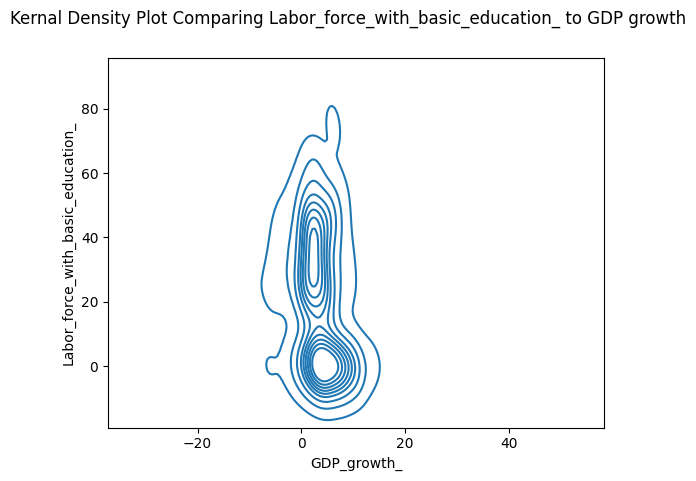

In [10]:
import matplotlib.pyplot as plt
sns.kdeplot(data=population_df, 
            x='GDP_growth_', 
            y='Labor_force_with_basic_education_')
plt.suptitle("Kernal Density Plot Comparing Labor_force_with_basic_education_ to GDP growth")
plt.show()

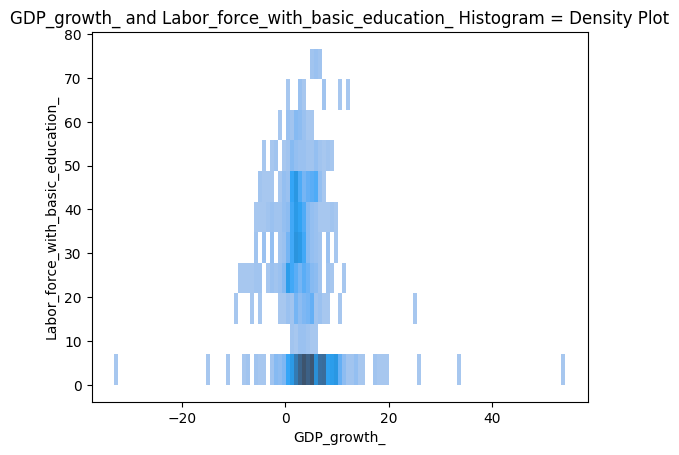

In [11]:
#for multiple variables
# Is the GDP_growth_ is determined(dependent on) by the Labor_force_with_basic_education_? 
sns.histplot(data=population_df, 
             x="GDP_growth_", 
             y="Labor_force_with_basic_education_")

plt.title("GDP_growth_ and Labor_force_with_basic_education_ Histogram = Density Plot")

plt.show()

There is a form of correlation between GDP_growth and Labor_force_with_ basic_education.

Using scattered plots to show correlation between GDP_growth_ and Labor_force_with_basic_education_.


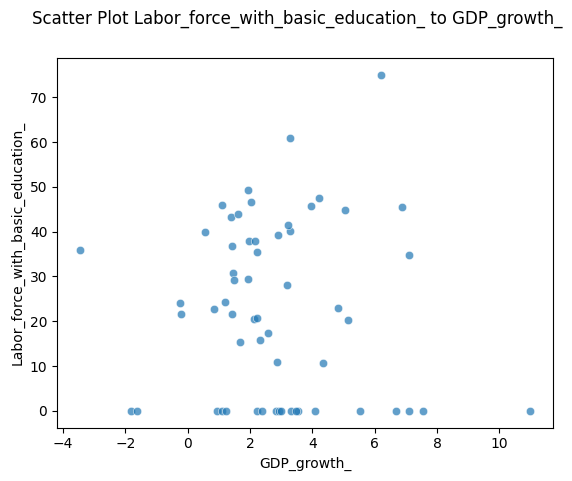

In [68]:

sns.scatterplot(data=population_df, 
                x="GDP_growth_", 
                y="Labor_force_with_basic_education_",
                alpha = 0.7)
plt.suptitle("Scatter Plot Labor_force_with_basic_education_ to GDP_growth_")
plt.show()

Using pearson's correlation coefficient to check correlation between numerical variables of GDP_growth and Labor_force_with_basic_education_ while  dropping empty rows in both columns.Ho: There is no correlation between the two variables
Ha: There is correlation between the two variables

In [27]:

from scipy.stats import pearsonr

data1 = population_df['GDP_growth_'].dropna()
data2 = population_df['Labor_force_with_basic_education_'].dropna()

stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Probably dependent')
else:
    print('Probably independent')


stat=-0.054, p=0.687
Probably dependent


In [12]:
from scipy.stats import pearsonr

data1 = population_df['GDP_growth_'].dropna()
data2 = population_df['Labor_force_with_basic_education_'].dropna()

stat, p = pearsonr(data1, data2)
print('%0.60f' % p)


0.000000000001737703635899081020590458976847064731258846181916


Summary statistics of the population dataframe

In [23]:
population_df.describe()

,CPIA_economic_management_cluster_average_,CPIA_financial_sector_rating_,CPIA_macroeconomic_management_rating_,Automated_teller_machines_,Borrowers_from_commercial_banks_,Depth_of_credit_information_index_,Domestic_credit_provided_by_financial_sector_%GDP_,Domestic_credit_to_private_sector_%GDP_,Market_capitalization_of_listed_companies_%GDP_,Private_credit_bureau_coverage_,...,Exports_of_goods_and_services_annual_growth_,"Foreign_direct_investment,_net_inflows_%GDP_","Foreign_direct_investment,_net_outflows_%GDP_",Fuel_exports_,High-technology_exports_,ICT_goods_imports_,Imports_of_goods_and_services_%GDP_,"Personal_remittances,_paid_","Personal_transfers,_receipts_","Taxes_on_income,_profits_and_capital_gains_"
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,...,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,5.800000e+01,5.800000e+01,58.000000
mean,0.250000,0.206897,0.241379,67.780524,144.678958,6.413793,110.972898,80.509116,71.909058,54.018966,...,2.681355,5.273701,4.379747,18.122802,13.379023,9.871181,42.445845,5.911472e+09,4.354606e+09,33.643138
std,0.927304,0.772524,0.899519,48.697687,251.343321,1.964907,72.278803,53.943631,137.130199,39.417386,...,4.622949,10.131001,9.736467,28.195250,11.815166,8.098260,30.899848,1.093554e+10,9.667317e+09,23.820149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-14.527559,-7.663361,-7.325377,0.000000,0.000000,0.000000,11.504409,0.000000e+00,0.000000e+00,-4.468999
25%,0.000000,0.000000,0.000000,32.488803,0.000000,6.000000,54.762128,40.719019,13.078293,15.575000,...,0.684995,1.052225,0.322041,1.840857,4.489227,5.478021,23.325038,3.581481e+08,0.000000e+00,4.822408
50%,0.000000,0.000000,0.000000,60.416955,0.000000,7.000000,109.792373,67.717496,42.286531,53.700000,...,2.476832,2.475844,1.642893,5.546279,11.782759,7.672313,34.327257,1.463247e+09,4.115002e+08,40.735642
75%,0.000000,0.000000,0.000000,97.358584,230.049769,7.000000,158.312746,123.884040,80.316757,100.000000,...,4.718549,4.497286,3.938081,17.800339,17.727097,10.656651,48.006908,5.518571e+09,3.260155e+09,50.502903
max,3.833330,3.500000,4.000000,222.989158,1232.995786,8.000000,345.149319,203.802440,995.145780,100.000000,...,13.863363,55.489931,53.165126,99.986485,55.102349,50.307417,184.708902,6.664900e+10,5.908377e+10,92.257875


In [42]:
import pandas as pd

# To drop rows with 0 and null values in the three columns
population1_df= population_df[(population_df['Labor_force_with_advanced_education_'] != 0) & (population_df['Labor_force_with_advanced_education_'].notnull()) &
        (population_df['Labor_force_with_basic_education_'] != 0) & (population_df['Labor_force_with_basic_education_'].notnull()) &
        (population_df['Labor_force_with_intermediate_education_'] != 0) & (population_df['Labor_force_with_intermediate_education_'].notnull())]

# Print the updated DataFrame
print(population1_df)


          Time Time_Code          Country_Name Country_Code  \
3   2016-01-01    YR2016               Austria          AUT   
4   2016-01-01    YR2016               Belgium          BEL   
5   2016-01-01    YR2016            Bangladesh          BGD   
6   2016-01-01    YR2016                Brazil          BRA   
7   2016-01-01    YR2016                Canada          CAN   
9   2016-01-01    YR2016              Colombia          COL   
10  2016-01-01    YR2016               Denmark          DNK   
12  2016-01-01    YR2016               Finland          FIN   
13  2016-01-01    YR2016                France          FRA   
14  2016-01-01    YR2016               Germany          DEU   
15  2016-01-01    YR2016                Greece          GRC   
18  2016-01-01    YR2016               Ireland          IRL   
19  2016-01-01    YR2016             Indonesia          IDN   
23  2016-01-01    YR2016                 Italy          ITA   
25  2016-01-01    YR2016              Malaysia         

In [43]:
population1_df.describe()


,CPIA_economic_management_cluster_average_,CPIA_financial_sector_rating_,CPIA_macroeconomic_management_rating_,Automated_teller_machines_,Borrowers_from_commercial_banks_,Depth_of_credit_information_index_,Domestic_credit_provided_by_financial_sector_%GDP_,Domestic_credit_to_private_sector_%GDP_,Market_capitalization_of_listed_companies_%GDP_,Private_credit_bureau_coverage_,...,Exports_of_goods_and_services_annual_growth_,"Foreign_direct_investment,_net_inflows_%GDP_","Foreign_direct_investment,_net_outflows_%GDP_",Fuel_exports_,High-technology_exports_,ICT_goods_imports_,Imports_of_goods_and_services_%GDP_,"Personal_remittances,_paid_","Personal_transfers,_receipts_","Taxes_on_income,_profits_and_capital_gains_"
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,...,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,3.900000e+01,3.900000e+01,39.000000
mean,0.098291,0.064103,0.102564,76.332848,150.192808,6.692308,117.065290,86.925625,80.154988,58.392308,...,2.928980,6.193288,5.498193,11.377071,13.792391,10.204730,45.463550,6.597766e+09,3.249360e+09,38.446661
std,0.613824,0.400320,0.640513,47.284398,229.586233,1.435524,64.351387,51.840283,163.419831,38.760645,...,4.741799,11.656742,11.620664,17.290434,11.336561,8.619522,31.307567,1.268601e+10,6.463169e+09,20.461927
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-14.527559,-7.663361,-7.325377,0.000000,0.000000,0.000000,12.079664,0.000000e+00,0.000000e+00,-4.468999
25%,0.000000,0.000000,0.000000,47.829279,0.000000,6.000000,62.467527,47.400145,18.605969,19.300000,...,0.982749,1.560456,0.549762,2.117146,6.383129,6.681708,28.239456,6.062596e+08,0.000000e+00,29.554789
50%,0.000000,0.000000,0.000000,69.289789,0.000000,7.000000,129.889612,77.225171,39.311388,75.700000,...,2.630312,2.715594,1.672971,4.912211,12.536063,7.966882,36.935838,1.541417e+09,4.444290e+08,41.640416
75%,0.000000,0.000000,0.000000,106.474125,280.349625,7.500000,162.568405,123.860985,79.754916,100.000000,...,4.573538,4.768307,3.742237,9.536349,17.676320,11.097953,54.068423,5.063506e+09,2.812443e+09,50.821072
max,3.833330,2.500000,4.000000,222.989158,803.890645,8.000000,241.891278,203.802440,995.145780,100.000000,...,13.863363,55.489931,53.165126,79.135529,55.102349,50.307417,184.708902,6.664900e+10,2.699328e+10,92.257875


In [70]:
population1_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 3 to 57
Data columns (total 92 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Time                                                        39 non-null     object 
 1   Time_Code                                                   39 non-null     object 
 2   Country_Name                                                39 non-null     object 
 3   Country_Code                                                39 non-null     object 
 4   CPIA_economic_management_cluster_average_                   39 non-null     float64
 5   CPIA_financial_sector_rating_                               39 non-null     float64
 6   CPIA_macroeconomic_management_rating_                       39 non-null     float64
 7   Automated_teller_machines_                                  39 non-null     float64
 8   Borrowe

Select columnsof interest for analysis.

In [71]:
# Select the columns columns
selected_columns_df = population1_df.iloc[:, [8,13,14,15,20,21, 22, 23, 31, 32,33, 47, 49, 51, 64]]

# Calculate the correlation matrix
corr = selected_columns_df.corr()
corr

,Borrowers_from_commercial_banks_,Private_credit_bureau_coverage_,Public_credit_registry_coverage_,Informal_payments_to_public_officials_,New_business_density_,"Labor_force_participation_rate,_total_","Labor_force,_total_","Total_employment,_total_",Labor_force_with_advanced_education_,Labor_force_with_basic_education_,Labor_force_with_intermediate_education_,"Population_ages_0-14,_total_","Population_ages_15-64,_total_","Population_ages_65_and_above,_total_",GDP_growth_
Borrowers_from_commercial_banks_,1.000000,-0.168223,0.649694,0.005897,-0.218222,-0.223705,0.086744,0.078119,0.021308,-0.096614,-0.199854,0.110914,0.110916,-0.011359,-0.109635
Private_credit_bureau_coverage_,-0.168223,1.000000,-0.469496,-0.131718,0.261738,0.179557,-0.030709,-0.030929,0.145983,-0.050378,0.240961,-0.192854,-0.072466,0.154406,-0.322305
Public_credit_registry_coverage_,0.649694,-0.469496,1.000000,-0.112276,-0.166172,-0.068896,0.070869,0.061146,0.188707,0.148854,0.038150,0.089115,0.076557,-0.010817,-0.017652
Informal_payments_to_public_officials_,0.005897,-0.131718,-0.112276,1.000000,-0.154234,-0.097052,0.029874,0.030527,-0.010886,0.017747,-0.232707,0.111913,0.058869,-0.020146,0.154324
New_business_density_,-0.218222,0.261738,-0.166172,-0.154234,1.000000,0.025573,-0.337934,-0.338248,0.228573,0.128961,0.371029,-0.363708,-0.354404,-0.238305,-0.110207
"Labor_force_participation_rate,_total_",-0.223705,0.179557,-0.068896,-0.097052,0.025573,1.000000,0.199854,0.217454,0.372263,0.758615,0.519970,0.096881,0.129412,0.023669,0.148451
"Labor_force,_total_",0.086744,-0.030709,0.070869,0.029874,-0.337934,0.199854,1.000000,0.998903,-0.164848,0.162302,-0.098170,0.928270,0.993096,0.855660,-0.003610
"Total_employment,_total_",0.078119,-0.030929,0.061146,0.030527,-0.338248,0.217454,0.998903,1.000000,-0.168249,0.173807,-0.097375,0.926550,0.990244,0.853141,0.023080
Labor_force_with_advanced_education_,0.021308,0.145983,0.188707,-0.010886,0.228573,0.372263,-0.164848,-0.168249,1.000000,0.424641,0.662508,-0.298015,-0.228255,-0.123158,-0.215880
Labor_force_with_basic_education_,-0.096614,-0.050378,0.148854,0.017747,0.128961,0.758615,0.162302,0.173807,0.424641,1.000000,0.521520,0.141361,0.119997,-0.038158,0.238590


In [72]:
selected_columns_df.describe()

,Borrowers_from_commercial_banks_,Private_credit_bureau_coverage_,Public_credit_registry_coverage_,Informal_payments_to_public_officials_,New_business_density_,"Labor_force_participation_rate,_total_","Labor_force,_total_","Total_employment,_total_",Labor_force_with_advanced_education_,Labor_force_with_basic_education_,Labor_force_with_intermediate_education_,"Population_ages_0-14,_total_","Population_ages_15-64,_total_","Population_ages_65_and_above,_total_",GDP_growth_
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,3.900000e+01,3.900000e+01,39.000000,39.000000,39.000000,3.900000e+01,3.900000e+01,3.900000e+01,39.000000
mean,150.192808,58.392308,17.430769,0.938462,3.885714,60.625077,3.005502e+07,2.805772e+07,74.375288,33.724715,56.545674,1.406636e+07,4.198451e+07,6.901738e+06,2.517171
std,229.586233,38.760645,28.812197,4.092394,5.202328,6.591647,3.556571e+07,3.371371e+07,7.576648,13.886003,12.370773,1.765604e+07,4.868216e+07,8.597942e+06,2.009779
min,0.000000,0.000000,0.000000,0.000000,0.000000,47.847000,2.248289e+06,2.070876e+06,52.880001,10.576300,14.920000,8.225790e+05,3.077557e+06,6.457000e+05,-3.468163
25%,0.000000,19.300000,0.000000,0.000000,0.487451,55.818499,5.105994e+06,4.640040e+06,71.014702,22.172950,52.383001,1.577166e+06,6.856606e+06,1.926632e+06,1.432509
50%,0.000000,75.700000,0.000000,0.000000,2.281082,60.493000,1.992649e+07,1.726070e+07,75.807899,35.433601,60.177502,7.678769e+06,2.620264e+07,3.567804e+06,2.162923
75%,280.349625,100.000000,33.200000,0.000000,4.677970,63.914999,3.634491e+07,3.535172e+07,79.943451,43.561449,63.168650,1.823111e+07,5.355802e+07,8.381674e+06,3.278573
max,803.890645,100.000000,100.000000,19.000000,27.341780,78.202003,1.627768e+08,1.548501e+08,87.386497,75.052399,73.278099,7.220515e+07,2.132548e+08,4.861269e+07,7.113465


Heatmap showing correlation in different variables.

<Axes: >

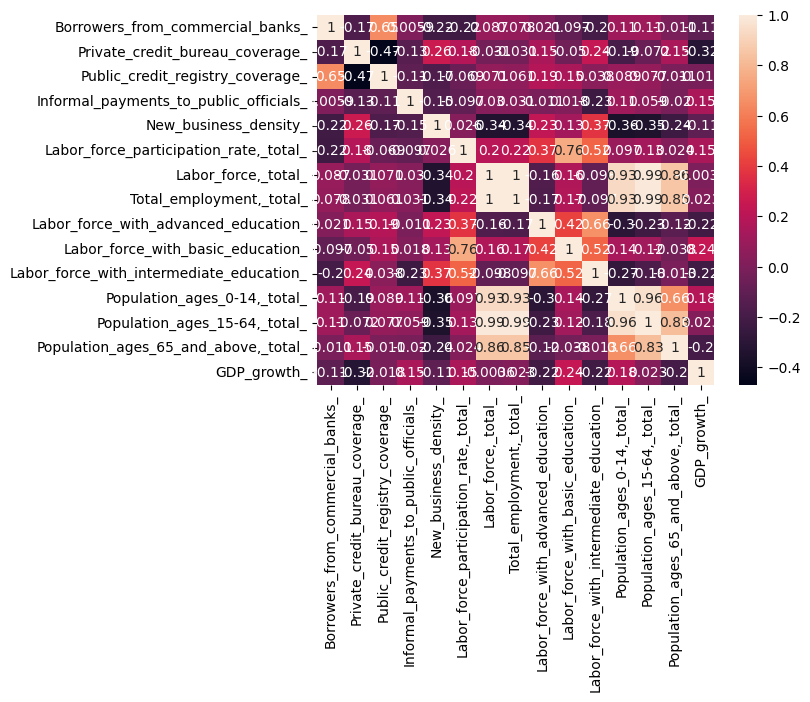

In [73]:
# Create a heat map with correlation data
sns.heatmap(data= corr, annot=True)

Building a statistical model. I am creating a simple linear regression model.
Regression analysis is a series of statistical processes used to estimate the relationships between a dependent variable and various independent variables in statistical modeling. 
Linear regression seeks the line that best matches the data according to a set of mathematical criteria.
In this case,this is estimating the value of GDP_growth_ variable based on the value of a list of independent variables.

In [74]:
#using  GDP_growth_ as the targeted variable(dependent) and others as independent variable
import statsmodels.api as sm
y =selected_columns_df[['GDP_growth_']]
X = selected_columns_df[['Borrowers_from_commercial_banks_',
                         'Private_credit_bureau_coverage_',
                         'Public_credit_registry_coverage_',
                         'Informal_payments_to_public_officials_',
                         'New_business_density_',                  
                         'Total_employment,_total_',
                         'Labor_force_with_basic_education_',
                         'Labor_force_with_intermediate_education_',	
                         'Labor_force,_total_',
                         'Population_ages_0-14,_total_',
                         'Population_ages_15-64,_total_',
                         'Population_ages_65_and_above,_total_']]
X = sm.add_constant(X)
X.head()

,const,Borrowers_from_commercial_banks_,Private_credit_bureau_coverage_,Public_credit_registry_coverage_,Informal_payments_to_public_officials_,New_business_density_,"Total_employment,_total_",Labor_force_with_basic_education_,Labor_force_with_intermediate_education_,"Labor_force,_total_","Population_ages_0-14,_total_","Population_ages_15-64,_total_","Population_ages_65_and_above,_total_"
3,1.0,0.000000,53.6,2.3,0.0,0.595666,4262611.0,30.795500,59.540798,4535197.0,1231543.0,5842759.0,1662366.0
4,1.0,698.712686,0.0,95.3,0.0,3.720330,4612772.0,21.712000,51.406399,5004722.0,1929882.0,7320116.0,2081424.0
5,1.0,73.028015,0.0,0.9,0.0,0.000000,62539699.0,34.860001,28.350000,65383994.0,47094392.0,107583339.0,8273829.0
6,1.0,549.234323,78.9,53.4,0.0,0.127907,91229860.0,35.907398,64.943199,103214044.0,45966597.0,144560447.0,17125821.0
7,1.0,0.000000,100.0,0.0,0.0,0.063882,18531444.0,36.766300,56.414799,19926490.0,5791771.0,24462794.0,6010039.0


In [55]:
model = sm.OLS(y, X) 
results = model.fit() 
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            GDP_growth_   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     3.810
Date:                Thu, 13 Jul 2023   Prob (F-statistic):            0.00208
Time:                        23:06:38   Log-Likelihood:                -62.269
No. Observations:                  39   AIC:                             150.5
Df Residuals:                      26   BIC:                             172.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

The R-squared value which is the coefficient of determination,shows proportion of the variance in the dependent variable(GDP_growth) that is predictable from the independent variables.
R-squared value of 0.637 indicates that approximately 63.7% of the variance in the dependent variable(GDP_growth-) can be explained or predicted by the independent variables included in this linear regression model.
For a better fit,  I will remove vindependent variables whose P-value is greater than 0.05 (P-value>0.05)

In [56]:
#Removing  independent variable, Labor_force_with_intermediate_education_ and Informal_payments_to_public_officials_ from the model. 
import statsmodels.api as sm
y =selected_columns_df[['GDP_growth_']]
X = selected_columns_df[['Borrowers_from_commercial_banks_',
                         'Private_credit_bureau_coverage_',
                         'Public_credit_registry_coverage_',
                         'New_business_density_',                  
                         'Total_employment,_total_',
                         'Labor_force_with_basic_education_',	
                         'Labor_force,_total_',
                         'Population_ages_0-14,_total_',
                         'Population_ages_15-64,_total_',
                         'Population_ages_65_and_above,_total_']]
X = sm.add_constant(X)
X.head()

,const,Borrowers_from_commercial_banks_,Private_credit_bureau_coverage_,Public_credit_registry_coverage_,New_business_density_,"Total_employment,_total_",Labor_force_with_basic_education_,"Labor_force,_total_","Population_ages_0-14,_total_","Population_ages_15-64,_total_","Population_ages_65_and_above,_total_"
3,1.0,0.000000,53.6,2.3,0.595666,4262611.0,30.795500,4535197.0,1231543.0,5842759.0,1662366.0
4,1.0,698.712686,0.0,95.3,3.720330,4612772.0,21.712000,5004722.0,1929882.0,7320116.0,2081424.0
5,1.0,73.028015,0.0,0.9,0.000000,62539699.0,34.860001,65383994.0,47094392.0,107583339.0,8273829.0
6,1.0,549.234323,78.9,53.4,0.127907,91229860.0,35.907398,103214044.0,45966597.0,144560447.0,17125821.0
7,1.0,0.000000,100.0,0.0,0.063882,18531444.0,36.766300,19926490.0,5791771.0,24462794.0,6010039.0


In [57]:
model = sm.OLS(y, X) 
results = model.fit() 
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            GDP_growth_   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     4.889
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           0.000422
Time:                        23:08:24   Log-Likelihood:                -62.356
No. Observations:                  39   AIC:                             146.7
Df Residuals:                      28   BIC:                             165.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [58]:
#Removing  independent variable, LPublic_credit_registry_coverage_ and Population_ages_15-64,_total_ from the model.
import statsmodels.api as sm
y =selected_columns_df[['GDP_growth_']]
X = selected_columns_df[['Borrowers_from_commercial_banks_',
                         'Private_credit_bureau_coverage_',
                         'New_business_density_',                  
                         'Total_employment,_total_',
                         'Labor_force_with_basic_education_',	
                         'Labor_force,_total_',
                         'Population_ages_0-14,_total_',
                         'Population_ages_65_and_above,_total_']]
X = sm.add_constant(X)
X.head()

,const,Borrowers_from_commercial_banks_,Private_credit_bureau_coverage_,New_business_density_,"Total_employment,_total_",Labor_force_with_basic_education_,"Labor_force,_total_","Population_ages_0-14,_total_","Population_ages_65_and_above,_total_"
3,1.0,0.000000,53.6,0.595666,4262611.0,30.795500,4535197.0,1231543.0,1662366.0
4,1.0,698.712686,0.0,3.720330,4612772.0,21.712000,5004722.0,1929882.0,2081424.0
5,1.0,73.028015,0.0,0.000000,62539699.0,34.860001,65383994.0,47094392.0,8273829.0
6,1.0,549.234323,78.9,0.127907,91229860.0,35.907398,103214044.0,45966597.0,17125821.0
7,1.0,0.000000,100.0,0.063882,18531444.0,36.766300,19926490.0,5791771.0,6010039.0


In [59]:
model = sm.OLS(y, X) 
results = model.fit() 
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            GDP_growth_   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     6.491
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           6.61e-05
Time:                        23:10:06   Log-Likelihood:                -62.464
No. Observations:                  39   AIC:                             142.9
Df Residuals:                      30   BIC:                             157.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [60]:
#Removing  independent variable, Borrowers_from_commercial_banks_ and Population_ages_65_and_above,_total_ from the model.
import statsmodels.api as sm
y =selected_columns_df[['GDP_growth_']]
X = selected_columns_df[['Private_credit_bureau_coverage_',                 
                         'Total_employment,_total_',
                         'Labor_force_with_basic_education_',	
                         'Labor_force,_total_',
                         'Population_ages_0-14,_total_',
                         'Population_ages_65_and_above,_total_']]
X = sm.add_constant(X)
X.head()

,const,Private_credit_bureau_coverage_,"Total_employment,_total_",Labor_force_with_basic_education_,"Labor_force,_total_","Population_ages_0-14,_total_","Population_ages_65_and_above,_total_"
3,1.0,53.6,4262611.0,30.795500,4535197.0,1231543.0,1662366.0
4,1.0,0.0,4612772.0,21.712000,5004722.0,1929882.0,2081424.0
5,1.0,0.0,62539699.0,34.860001,65383994.0,47094392.0,8273829.0
6,1.0,78.9,91229860.0,35.907398,103214044.0,45966597.0,17125821.0
7,1.0,100.0,18531444.0,36.766300,19926490.0,5791771.0,6010039.0


In [61]:
model = sm.OLS(y, X) 
results = model.fit() 
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            GDP_growth_   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     9.084
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           8.00e-06
Time:                        23:12:16   Log-Likelihood:                -62.663
No. Observations:                  39   AIC:                             139.3
Df Residuals:                      32   BIC:                             151.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


R-squared value of  0.630 indicates that approximately 63.0% of the variance in the dependent variable(GDP_growth-) can be explained or predicted by the independent variables included in this linear regression model.
Although there are still more independent variables to remove because of the high P-value which is greater than 0.05 (P-value>0.05), this is still the best fit model for this regression.
